# Self-Supervised Visual Representation Learning by Sorting Long Sequences
BMVC2021


Part of  this  Code is forked From VCOP and edited to create our own model , CVPR2019   


# Package and requirements

In [ ]:
#@title Package and requirements
!wget https://www.dropbox.com/s/uub8xvm7p3pq0rk/requirements.txt 
!pip install "tensorboardX== 1.9"
!pip install -r requirements.txt

#title Load Video
!wget https://www.dropbox.com/s/f7f2p6siykm24yx/AnonyGrouping.m4v   
!wget https://www.dropbox.com/s/bnx2mqsdt1y7j43/AnonyModel.m4v 
!wget https://www.dropbox.com/s/nxx5dcmgiwp11ek/r3d.py
!wget https://www.dropbox.com/s/wkrdu5re1g9vjo3/r21d.py
!wget https://www.dropbox.com/s/rilwhhrteghoaoc/ucf101.py 

--2021-07-02 19:13:43--  https://www.dropbox.com/s/uub8xvm7p3pq0rk/requirements.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uub8xvm7p3pq0rk/requirements.txt [following]
--2021-07-02 19:13:44--  https://www.dropbox.com/s/raw/uub8xvm7p3pq0rk/requirements.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc54be88080a3bab8711df3e2ba8.dl.dropboxusercontent.com/cd/0/inline/BRiGs1QPsGJdhXdq3PEdtGCyQdDIs508Sbox9vY1GHDVZjo03MeJmfDWBnrkcy50SkamDKNOnSDTIZR1yUBO6-cWcezKneDe8Mk9p33KfovbR9OTjuTZDTXnwIlXdaVm88Huq2ZBBXM_q6EY2qHwd1Of/file# [following]
--2021-07-02 19:13:44--  https://uc54be88080a3bab8711df3e2ba8.dl.dropboxusercontent.com/cd/0/inline/BRiGs1QPsGJdhXdq3PEdtGCyQdDIs508Sbox9vY1GHDVZjo03MeJmfDWBnrkcy50SkamDKNOnSDTIZ

#play demo Grouping and model1

In [ ]:
#@title Play Video Grouping
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "AnonyGrouping.m4v"

# Compressed video path
compressed_path = "AnonyGrouping.m4v"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title Play Video Model1
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "AnonyModel.m4v"

# Compressed video path
compressed_path = "AnonyModel.m4v"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# create Model

In [1]:
#@title Create model
%%writefile LopnmodelV1.py

import math
from collections import OrderedDict

import torch
import torch.nn as nn
from torch.nn.modules.utils import _triple

class LOPN(nn.Module):
    """ Forked and edited from: Video clip order prediction with PFE (Pairwire Feature Extraction), the same as OPN."""
    def __init__(self, base_network, feature_size, tuple_len):
        """
        Args:
            feature_size (int): 512
        """
        super(LOPN, self).__init__()

        self.base_network = base_network
        self.feature_size = feature_size
        self.tuple_len = tuple_len
        self.class_num = math.factorial(tuple_len)
        self.class_num=int(self.class_num/2)

        self.fc7 = nn.Linear(self.feature_size*2, 512)
        pair_num = int(tuple_len*(tuple_len-1)/2)
        pair_num=pair_num
        self.fc8 = nn.Linear(512*pair_num, self.class_num)

        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU(inplace=True)

    #def forward(self, tuple):
        #f = []  # clip features
        #for i in range(self.tuple_len):
            #clip = tuple[:, i, :, :, :, :]
            
            #f.append(self.base_network(clip))

    def forward(self, tuple):
      f = []  # frame features
      pf = []  # pairwise concat
      #data_frame=[]
      #print(tuple.shape,'tpl s')

      for ii in range(self.tuple_len):
          for j in range(ii+1, self.tuple_len):
              a = tuple[:, ii, :, :, :]
              b = tuple[:, j, :, :, :]
              clip=torch.stack([a, b], dim=2)
              pf.append(self.base_network(clip))
              #clip2=torch.stack([b, a], dim=2)
              
              #pf.append(self.base_network(clip2))
            
 
      pf = [self.fc7(i) for i in pf]
      pf = [self.relu(i) for i in pf]
      h = torch.cat(pf, dim=1)
      h = self.dropout(h)
      h = self.fc8(h)  # logits
      #print(h,'h is')

      return h




Writing LopnmodelV1.py


# Download sample and result

In [ ]:
#@title Load and extract full samples and results from test set UCF Results are provided in text file in each folder
#3-tuple
!wget https://www.dropbox.com/s/fzyevp9ue0n3cgn/res3r3d.rar
!unrar x -Y "/content/res3r3d.rar" 


 #4-tuple
!wget https://www.dropbox.com/s/t5617864q3416wg/res4all2.rar
!unrar x -Y "/content/res4all2.rar" 


#5-tuple
!wget https://www.dropbox.com/s/h1150cjv975xmfk/res5.rar
!unrar x -Y "/content/res5.rar" 

#6-tuple
!wget https://www.dropbox.com/s/w62melcyblxrw3e/res6.rar 
!unrar x -Y "/content/res6.rar" 

#7-tuple
!wget https://www.dropbox.com/s/ifb631lo5clvt5l/res7all.rar 
!unrar x -Y "res7all.rar" 

In [ ]:
!dir  res3r3d

a1000image_0tpl3.jpg  a2136image_1tpl3.jpg  a3271image_2tpl3.jpg
a1000image_1tpl3.jpg  a2136image_2tpl3.jpg  a3272image_0tpl3.jpg
a1000image_2tpl3.jpg  a2137image_0tpl3.jpg  a3272image_1tpl3.jpg
a1001image_0tpl3.jpg  a2137image_1tpl3.jpg  a3272image_2tpl3.jpg
a1001image_1tpl3.jpg  a2137image_2tpl3.jpg  a3273image_0tpl3.jpg
a1001image_2tpl3.jpg  a2138image_0tpl3.jpg  a3273image_1tpl3.jpg
a1002image_0tpl3.jpg  a2138image_1tpl3.jpg  a3273image_2tpl3.jpg
a1002image_1tpl3.jpg  a2138image_2tpl3.jpg  a3274image_0tpl3.jpg
a1002image_2tpl3.jpg  a2139image_0tpl3.jpg  a3274image_1tpl3.jpg
a1003image_0tpl3.jpg  a2139image_1tpl3.jpg  a3274image_2tpl3.jpg
a1003image_1tpl3.jpg  a2139image_2tpl3.jpg  a3275image_0tpl3.jpg
a1003image_2tpl3.jpg  a213image_0tpl3.jpg   a3275image_1tpl3.jpg
a1004image_0tpl3.jpg  a213image_1tpl3.jpg   a3275image_2tpl3.jpg
a1004image_1tpl3.jpg  a213image_2tpl3.jpg   a3276image_0tpl3.jpg
a1004image_2tpl3.jpg  a2140image_0tpl3.jpg  a3276image_1tpl3.jpg
a1005image_0tpl3.jpg  a21

# Test Model

In [ ]:
#@title Test model -(Images are selected from testset)
import os
import math
import itertools
import argparse
import time
import random
import torchvision.utils as tor
import pandas as pd
import numpy as np
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import torch.optim as optim
from LopnmodelV1 import LOPN
from r3d import R3DNet
from r21d import R2Plus1DNet
from PIL import Image
from shutil import copyfile
from torchvision import transforms
import cv2
import numpy
import matplotlib.pyplot as plt
from  ucf101 import UCF101FOPDataset
 
 
  
"""Compare using 4-tuple model"""
def compare( tuple_clips, tuple_len, ckpt,device, bsmodel= 'r3d' ,gpu='0'):
    len=tuple_len
    if bsmodel == 'c3d':
        base = C3D(with_classifier=False)
    elif bsmodel == 'r3d':
        base = R3DNet(layer_sizes=(1,1,1,1), with_classifier=False)
    elif bsmodel == 'AlexNet':
        base = AlexNet(with_classifier=False, return_conv=False)
    elif bsmodel == 'r21d':   
        base = R2Plus1DNet(layer_sizes=(1,1,1,1), with_classifier=False)
    opn = LOPN(base_network=base, feature_size=256, tuple_len=len ).to(device)   
    opn.load_state_dict(torch.load(ckpt))
 
    # Force the pytorch to create context on the specific device 
    model=opn
    torch.set_grad_enabled(False) 
    model.eval()
    pts=[]  
    outputs=[]
 
    inputs = torch.tensor(tuple_clips).to(device)
    # forward  
    if torch.cuda.is_available():
      model.to(device)
    #torch.set_grad_enabled(False)
    inputs = inputs.float()
    outputs = model(inputs)
    #print('me1')
    pts = torch.argmax(outputs, dim=1)
    return pts
 

 
#############################my main

bsmodel='r3d' 
# model dir here 4-tuple
 


model = "tuple_7_r3d" #@param ['tuple_3_r3d', 'tuple_4_r3d', 'tuple_5_r3d' ,'tuple_7_r3d'  ]
 
#load model
if (model=="tuple_3_r3d")  :
  !wget  https://www.dropbox.com/s/mjy223y17we6q91/LOPN3-r3d.pt
  ckpt= 'LOPN3-r3d.pt' 
  xtuple=3
if (model=="tuple_4_r3d")  :
  !wget  https://www.dropbox.com/s/b1zw4t19qgqsevl/LOPN4-r3d.pt
  ckpt= 'LOPN4-r3d.pt' 
  xtuple=4
if (model=="tuple_5_r3d")  :
  !wget https://www.dropbox.com/s/dk6dxjy8gmwgs9n/LOPN5-r3d.pt
  ckpt= 'LOPN5-r3d.pt' 
  xtuple=5
if (model=="tuple_7_r3d")  :        
  !wget https://www.dropbox.com/s/dxpqa5jiolgvxj5/LOPN7-r3d.pt
  ckpt= 'LOPN7-r3d.pt' 
  xtuple=7
 


gpu=0
torch.backends.cudnn.benchmark = True
# Force the pytorch to create context on the specific device 
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu)
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print("device",device)
 
 
gpu=gpu
seed=632
if seed:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if gpu:
        torch.cuda.manual_seed_all(seed)
 
 
 
m1=1
classes = list(itertools.permutations(list(range(xtuple))))
# input from dataloader 
#test_dataset = UCF101FOPDataset('data/ucf101/ucf32',  8, 8, False, test_transforms)
 
#test_dataloader = DataLoader(test_dataset, 1, shuffle=False, num_workers=0, pin_memory=True)                             
all=0
acc=0
#for i, data in  enumerate(test_dataloader, 1):
print('sampleeeeeeeeeeeeeeeeeeeeee')
pts=[]
targets=[]
outputs=[]
 
 #sample input 
 
im1='res7all/a319image_0tpl7.jpg' #@param {type:"string"}
im2='res7all/a319image_1tpl7.jpg' #@param {type:"string"}
im3='res7all/a319image_2tpl7.jpg' #@param {type:"string"}
im4='res7all/a319image_3tpl7.jpg' #@param {type:"string"}
im5='res7all/a319image_4tpl7.jpg' #@param {type:"string"}
im6='res7all/a319image_5tpl7.jpg' #@param {type:"string"}
im7='res7all/a319image_6tpl7.jpg' #@param {type:"string"}




###########sorry dirty code!!  :)
a= cv2.imread(im1)
b= cv2.imread(im2)
c= cv2.imread(im3)
d= cv2.imread(im4)
e= cv2.imread(im5)
f= cv2.imread(im6)
g= cv2.imread(im7)

test_transforms = transforms.Compose([
    #transforms.Resize((128, 171)),
    #transforms.CenterCrop(112),
    #transforms.RandomCrop(20,30),
    transforms.ToTensor()
])
 
toPIL = transforms.ToPILImage()
a= cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b= cv2.cvtColor(b, cv2.COLOR_BGR2RGB) 
c= cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
d= cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
e= cv2.cvtColor(e, cv2.COLOR_BGR2RGB)
f= cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
g= cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
 
 
 
a = toPIL(a) # PIL image
a = test_transforms(a) # tensor [C x H x W]
 
b = toPIL(b) # PIL image
b = test_transforms(b) # tensor [C x H x W]
 
c = toPIL(c) # PIL image
c = test_transforms(c) # tensor [C x H x W]a = toPIL(a) # PIL image

d = toPIL(d) # PIL image
d = test_transforms(d) # tensor [C x H x W]a = toPIL(a) # PIL image

e = toPIL(e) # PIL image
e = test_transforms(e) # tensor [C x H x W]a = toPIL(a) # PIL image

f = toPIL(f) # PIL image
f = test_transforms(f) # tensor [C x H x W]a = toPIL(a) # PIL image

g = toPIL(g) # PIL image
g = test_transforms(g) # tensor [C x H x W]a = toPIL(a) # PIL image
 
 
#dirty code 
problem1=[]
problem1.append(a)
problem1.append(b)
problem1.append(c)
if xtuple>=4:
    problem1.append(d)
if xtuple>=5:
    problem1.append(e)
if xtuple>=6:
    problem1.append(f)
if xtuple>=7:
    problem1.append(g)  
 
prob1= torch.stack(problem1)
 
 
prob1= prob1[None,:,:,:,:]
 

  

--2021-07-02 20:33:00--  https://www.dropbox.com/s/dxpqa5jiolgvxj5/LOPN7-r3d.pt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dxpqa5jiolgvxj5/LOPN7-r3d.pt [following]
--2021-07-02 20:33:00--  https://www.dropbox.com/s/raw/dxpqa5jiolgvxj5/LOPN7-r3d.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucda1f859fa741bc9ba35579eb72.dl.dropboxusercontent.com/cd/0/inline/BRib9_R8qcf4wK7B6Ff-q9DZO_cxAzji-zrHUCMe7Ke1ctZ69q-7DqEaWiv0tyqq-0wcA4KHqn0omGJObT7o2t4u6vuzLrP7n1YYuk3S01S8mZq4jTDc6SWXH3QgKIOZlX9CRAs8vaScnjyRU0SkgANX/file# [following]
--2021-07-02 20:33:01--  https://ucda1f859fa741bc9ba35579eb72.dl.dropboxusercontent.com/cd/0/inline/BRib9_R8qcf4wK7B6Ff-q9DZO_cxAzji-zrHUCMe7Ke1ctZ69q-7DqEaWiv0tyqq-0wcA4KHqn0omGJObT7o2t4u6v

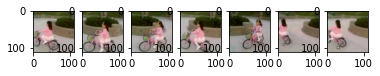

In [ ]:
#@title Test input
import numpy as np
import matplotlib.pyplot as plt

 
rows = 1
cols = 7
axes=[]
fig=plt.figure()
cnt=0
for a in range(rows*cols):
   
    axes.append( fig.add_subplot(rows, cols, a+1) )
    
    #subplot_title=("Subplot"+str(a))
    #axes[-1].set_title(subplot_title)
    
    plt.imshow(prob1[0,cnt,:,:,:].permute(1,2,0) )
    cnt+=1;
    if cnt>=xtuple:
      break
#fig.tight_layout()    
plt.show()

In [ ]:
#@title Sort using predicted class
"""SortFW"""
def sortme(classes,pts,prob4,xtuple  ):
    map4=[]
    sortp4=[]
    h=classes[pts]    
    for i in range(xtuple):
        #fwi=fwcls[i]
        pi=h.index(i)
        #zero:batch 0 :)
        ho=prob4[0,pi,:,:,:]
        sortp4.append( ho) 
       
    sortp4=torch.stack(sortp4)
    return sortp4 
 



pts1= compare( prob1   , xtuple, ckpt,device, bsmodel ,gpu='0') 
 
classes = list(itertools.permutations(list(range(xtuple))))
 

print(pts1)
sortp4 = sortme(classes,pts1,prob1 ,xtuple )
#tst=sortp4[None,:,:,:,:]
 

tensor([1888], device='cuda:0')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


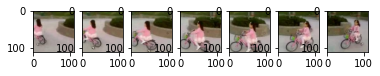

In [ ]:
#@title Result visualization
import numpy as np
import matplotlib.pyplot as plt

 
rows = 1
cols = 7
axes=[]
fig=plt.figure()
cnt=0
for a in range(rows*cols):
    b = np.random.randint(7, size=(10,10))
    axes.append( fig.add_subplot(rows, cols, a+1) )
    
    #subplot_title=("Subplot"+str(a))
    #axes[-1].set_title(subplot_title)
    
    plt.imshow(sortp4[cnt,:,:,:].permute(1,2,0) )
    cnt+=1;
    if cnt>=xtuple:
      break
#fig.tight_layout()    
plt.show()

# Training and full test

In [ ]:
#@title  Training code (Please download the UCF dataset)

%%writefile Lopn5V1.py
"""Forked from Video clip order prediction and edited!!!."""

import os
import math
import itertools
import argparse
import time
import random
import torchvision.utils as tor
import pandas as pd
import numpy as np
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import torch.optim as optim
from LopnmodelV1 import LOPN
from r3d import R3DNet
from r21d import R2Plus1DNet
from PIL import Image
from shutil import copyfile
from torchvision import transforms
import cv2
import numpy
import matplotlib.pyplot as plt
from  ucf101 import UCF101FOPDataset

from tensorboardX import SummaryWriter
 
from PIL import Image

from shutil import copyfile

def order_class_index(order):
    """Return the index of the order in its full permutation.
    
    Args:
        order (tensor): e.g. [0,1,2]
    """
    classes = list(itertools.permutations(list(range(len(order)))))
    m=classes.index(tuple(order.tolist()))
    #-----------------------our Grouping -------------
    if(m>=60):
      m=119-m
    return m  
    #means
    # if(m==119):
    #   m=0
    # # elif(m==118):
    # #   m=1
    # # elif(m==117):
    # #   m=2
    # # elif(m==116):
    # #   m=3
    # # elif(m==115):
    # #   m=4
    # # elif(m==114):
    # #   m=5
    # # elif(m==113):
    # #   m=6
    # # elif(m==112):
    # #   m=7
    # # elif(m==111):
    # #   m=8
    # # elif(m==110):
    # #   m=9
    # # elif(m==109):
    # #   m=10
    # # elif(m==108):
    # #   m=11  
    # # elif(m==107):
    # #   m=12
    # # elif(m==106):
    # #   m=13
    # # elif(m==105):
    # #   m=14
    # # elif(m==104):
    # #   m=15
    # # elif(m==103):
    # #   m=16
    # # elif(m==102):
    # #   m=17
    # # elif(m==101):
    # #   m=18
    # # elif(m==100):
    # #   m=19
    # # elif(m==99):
    # #   m=20
    # # elif(m==98):
    # #   m=21    
    # # elif(m==97):
    # #   m=22
    # # elif(m==96):
    # #   m=23
    # # elif(m==95):
    # #   m=24
    # # elif(m==94):
    # #   m=25
    # # elif(m==93):
    # #   m=26
    # # elif(m==92):
    # #   m=27
    # # elif(m==91):
    # #   m=28
    # # elif(m==90):
    # #   m=29
    # # elif(m==89):
    # #   m=30
    # # elif(m==88):
    # #   m=31    

    # # elif(m==87):
    # #   m=32
    # # elif(m==86):
    # #   m=33
    # # elif(m==85):
    # #   m=34
    # # elif(m==84):
    # #   m=35
    # # elif(m==83):
    # #   m=36
    # # elif(m==82):
    # #   m=37
    # # elif(m==81):
    # #   m=38
    # # elif(m==80):
    # #   m=39
    # # elif(m==79):
    # #   m=40
    # # elif(m==78):
    # #   m=41    
    # # elif(m==77):
    # #   m=42
    # # elif(m==76):
    # #   m=43
    # # elif(m==75):
    # #   m=44
    # # elif(m==74):
    # #   m=45
    # # elif(m==73):
    # #   m=46
    # # elif(m==72):
    # #   m=47
    # # elif(m==71):
    # #   m=48
    # # elif(m==70):
    # #   m=49
    # # elif(m==69):
    # #   m=50
    # # elif(m==68):
    # #   m=51  
    # # elif(m==67):
    # #   m=52
    # # elif(m==66):
    # #   m=53
    # # elif(m==65):
    # #   m=54
    # # elif(m==64):
    # #   m=55
    # # elif(m==63):
    # #   m=56
    # # elif(m==62):
    # #   m=57
    # # elif(m==61):
    # #   m=58
    # # elif(m==60):
    # #   m=59
   

    #return classes.index(tuple(order.tolist()))


def train(args, model, criterion, optimizer, device, train_dataloader, writer, epoch):
    torch.set_grad_enabled(True)
    model.train()
    running_loss = 0.0
    correct = 0
    for i, data in enumerate(train_dataloader, 1):
        # get inputs
        tuple_clips, tuple_orders = data
        inputs = tuple_clips.to(device)
        targets = [order_class_index(order) for order in tuple_orders]
        targets = torch.tensor(targets).to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward and backward
        outputs = model(inputs) # return logits here
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
        #print('a112')
        # compute loss and acc
        running_loss += loss.item()
        pts = torch.argmax(outputs, dim=1)
        correct += torch.sum(targets == pts).item()
        #print('a113')
        # print statistics and write summary every N batch
        if i % args.pf == 0:
            avg_loss = running_loss / args.pf
            #print('a115')
            avg_acc = correct / (args.pf * args.bs)
            print('[TRAIN] epoch-{}, batch-{}, loss: {:.3f}, acc: {:.3f}'.format(epoch, i, avg_loss, avg_acc))
            step = (epoch-1)*len(train_dataloader) + i
            writer.add_scalar('train/CrossEntropyLoss', avg_loss, step)
            writer.add_scalar('train/Accuracy', avg_acc, step)
            running_loss = 0.0
            correct = 0
            #print('a3')
    # summary params and grads per eopch
    for name, param in model.named_parameters():
        writer.add_histogram('params/{}'.format(name), param, epoch)
        writer.add_histogram('grads/{}'.format(name), param.grad, epoch)


def validate(args, model, criterion, device, val_dataloader, writer, epoch):
    torch.set_grad_enabled(False)
    model.eval()
    
    total_loss = 0.0
    correct = 0
    for i, data in enumerate(val_dataloader):
        # get inputs
        tuple_clips, tuple_orders = data
        inputs = tuple_clips.to(device)
        targets = [order_class_index(order) for order in tuple_orders]
        targets = torch.tensor(targets).to(device)
        # forward
        outputs = model(inputs) # return logits here
        loss = criterion(outputs, targets)
        # compute loss and acc
        total_loss += loss.item()
        pts = torch.argmax(outputs, dim=1)
        correct += torch.sum(targets == pts).item()
        # print('correct: {}, {}, {}'.format(correct, targets, pts))
    avg_loss = total_loss / len(val_dataloader)
    avg_acc = correct / len(val_dataloader.dataset)
    writer.add_scalar('val/CrossEntropyLoss', avg_loss, epoch)
    writer.add_scalar('val/Accuracy', avg_acc, epoch)
    print('[VAL] loss: {:.3f}, acc: {:.3f}'.format(avg_loss, avg_acc))
    return avg_loss,avg_acc


def test(args, model, criterion, device, test_dataloader):
    torch.set_grad_enabled(False)
    model.eval()

    total_loss = 0.0
    correct = 0
    for i, data in enumerate(test_dataloader, 1):
        pts=[]
        targets=[]
        outputs=[]

        # get inputs
        tuple_clips, tuple_orders = data
        inputs = tuple_clips.to(device)
        targets = [order_class_index(order) for order in tuple_orders]
        targets = torch.tensor(targets).to(device)
        # forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # compute loss and acc
        total_loss += loss.item()
        pts = torch.argmax(outputs, dim=1)
        if(i%10==0):
          torch.set_printoptions(profile="full")
          print('targ is',targets)
          print('pts  is',pts)
          #print('out  is',outputs)
          torch.set_printoptions(profile="default") 
           
        correct += torch.sum(targets == pts).item()
        # print('correct: {}, {}, {}'.format(correct, targets, pts))
    avg_loss = total_loss / len(test_dataloader)
    avg_acc = correct / len(test_dataloader.dataset)
    print('[TEST] loss: {:.3f}, acc: {:.3f}'.format(avg_loss, avg_acc))
    return avg_loss

def parse_args():

    
    parser = argparse.ArgumentParser(description='Video Clip Order Prediction')
    parser.add_argument('--mode', type=str, default='train', help='train/test')
    parser.add_argument('--model', type=str, default='r3d', help='c3d/r3d/r21d')
    parser.add_argument('--cl', type=int, default=16, help='clip length')
    parser.add_argument('--it', type=int, default=8, help='interval')
    parser.add_argument('--tl', type=int, default=5, help='tuple length')
    parser.add_argument('--gpu', type=int, default=0, help='GPU id')
    parser.add_argument('--lr', type=float, default=1e-3, help='learning rate')
    parser.add_argument('--momentum', type=float, default=9e-1, help='momentum')
    parser.add_argument('--wd', type=float, default=5e-4, help='weight decay')
    parser.add_argument('--log', type=str,default='/content/drive/My Drive/opnmodel/vcopopntl5half/', help='log directory')
    parser.add_argument('--ckpt', type=str,help='checkpoint path')#default= 
    parser.add_argument('--desp', type=str, help='additional description')
    parser.add_argument('--epochs', type=int, default=900, help='number of total epochs to run')
    parser.add_argument('--start-epoch', type=int, default=778, help='manual epoch number (useful on restarts)')
    parser.add_argument('--bs', type=int, default=70, help='mini-batch size')
    parser.add_argument('--workers', type=int, default=6, help='number of data loading workers')
    parser.add_argument('--pf', type=int, default=40, help='print frequency every batch')
    parser.add_argument('--seed', type=int, default=632, help='seed for initializing training.')
    args = parser.parse_args()
    return args


if __name__ == '__main__':
    args = parse_args()
    print(vars(args))

    torch.backends.cudnn.benchmark = True
    # Force the pytorch to create context on the specific device 
    os.environ["CUDA_VISIBLE_DEVICES"] = str(args.gpu)
    device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
    print("device",device)
    print(torch.cuda.get_device_properties(device))
    if args.seed:
        random.seed(args.seed)
        np.random.seed(args.seed)
        torch.manual_seed(args.seed)
        if args.gpu:
            torch.cuda.manual_seed_all(args.seed)

    ########### model ##############
    if args.model == 'c3d':
        base = C3D(with_classifier=False)
    elif args.model == 'r3d':
        base = R3DNet(layer_sizes=(1,1,1,1), with_classifier=False)
    elif args.model == 'AlexNet':
        base = AlexNet(with_classifier=False, return_conv=False)
    elif args.model == 'r21d':   
        base = R2Plus1DNet(layer_sizes=(1,1,1,1), with_classifier=False)
    #opn = OPN(base_network=base, feature_size=256, tuple_len=args.tl).to(device)
    opn = LOPN(base_network=base, feature_size=256, tuple_len=args.tl).to(device)   

    if args.mode == 'train':  ########### Train #############
        if args.ckpt:  # resume training
            #print('happent')
            opn.load_state_dict(torch.load(args.ckpt))
            log_dir = os.path.dirname(args.ckpt)
            #print('1')
        else:
            if args.desp:
                exp_name = '{}_cl{}_it{}_tl{}_{}_{}'.format(args.model, args.cl, args.it, args.tl, args.desp, time.strftime('%m%d%H%M'))
            else:
                exp_name = '{}_cl{}_it{}_tl{}_{}'.format(args.model, args.cl, args.it, args.tl, time.strftime('%m%d%H%M'))
            log_dir = os.path.join(args.log, exp_name)
            #print('exp',exp_name)
        writer = SummaryWriter(log_dir)

        train_transforms = transforms.Compose([
            transforms.Resize((128, 171)),
            transforms.CenterCrop(112),
            #transforms.RandomCrop(20,30),
            transforms.ToTensor()
        ])
        #train_dataset = UCF101VCOPDataset('data/ucf101', args.cl, args.it, args.tl, True, train_transforms)
        train_dataset = UCF101FOPDataset('data/ucf101/ucf16',  args.it, args.tl, True, train_transforms)

        #val_size = 800
        #print('t1',train_dataset)
        train_size = int(0.9 * len(train_dataset))
        test_size = len(train_dataset) - train_size        
        train_dataset, val_dataset = random_split(train_dataset, (train_size, test_size))
        print('TRAIN video number: {}, VAL video number: {}.'.format(len(train_dataset), len(val_dataset)))
        train_dataloader = DataLoader(train_dataset, batch_size=args.bs, shuffle=True,
                                    num_workers=args.workers, pin_memory=True)
        val_dataloader = DataLoader(val_dataset, batch_size=args.bs, shuffle=False,
                                    num_workers=args.workers, pin_memory=True)
        #print('train_dataloader',train_dataloader)
        if args.ckpt:
            pass
        else:
            # save graph and clips_order samples
            for data in train_dataloader:
                #print('data1 ')
                tuple_frame, tuple_orders = data

                for i in range(args.tl):
                        writer.add_images('train/tuple_frame', tuple_frame[:, i, :, :, :], i)
                        writer.add_text('train/tuple_orders', str(tuple_orders[:, i].tolist()), i)
                #tuple_clips = tuple_clips.to(device)
                tuple_frame = tuple_frame.to(device)
                print('tps',tuple_frame.size())
                #writer.add_graph(opn, tuple_frame,verbose=False)
                writer.add_graph(opn, tuple_frame)
                #writer.flush()
                #writer.close()
                break
            # save init params at step 0
            for name, param in opn.named_parameters():
                writer.add_histogram('params/{}'.format(name), param, 0)

        ### loss funciton, optimizer and scheduler ###
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(opn.parameters(), lr=args.lr, momentum=args.momentum, weight_decay=args.wd)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', min_lr=1e-5, patience=50, factor=0.1)

        prev_best_val_loss = float('inf')
        prev_best_val_acc=0
        val_loss = float('inf')
        val_acc=0
        prev_best_model_path = None
        model_path_prev=None
        print('here i am')
        for epoch in range(args.start_epoch, args.start_epoch+args.epochs):
            if args.start_epoch==epoch:
              time_start = time.time()
            train(args, opn, criterion, optimizer, device, train_dataloader, writer, epoch)
            if args.start_epoch==epoch:
              print('Epoch time: {:.2f} s.'.format(time.time() - time_start))
            # scheduler.step(val_loss)         
            val_loss,val_acc = validate(args, opn, criterion, device, val_dataloader, writer, epoch)
            # scheduler.step(val_loss)         
            writer.add_scalar('train/lr', optimizer.param_groups[0]['lr'], epoch)            # save model every 1 epoches
            if epoch % 1 == 0:
                torch.save(opn.state_dict(), os.path.join(log_dir, 'model_{}.pt'.format(epoch)))
                if model_path_prev:
                  open(model_path_prev, 'w').close() #overwrite and make the file blank instead - ref: https://stackoverflow.com/a/4914288/3553367
                  os.remove(model_path_prev) #delete the blank file from google drive will move the file to bin instead
                model_path_prev = os.path.join(log_dir, 'model_{}.pt'.format(epoch))
   
                #model_path2 = os.path.join('/content/drive/My Drive/opnmodel/cpu128/', 'model_{}.pt'.format(epoch))
                #model_path = os.path.join(log_dir, 'model_{}.pt'.format(epoch))
                #copyfile(model_path, model_path2)
                # Create & upload a text file.
                #uploaded = drive.CreateFile({'title': 'Sample file.txt'})
                #model_path.SetContentString('Sample upload file content')

            # save model for the best val
            if val_loss < prev_best_val_loss:
                model_path = os.path.join(log_dir, 'best_model_{}_{:.3f}__{:.3f}.pt'.format(epoch,val_loss,val_acc))
                torch.save(opn.state_dict(), model_path)
                prev_best_val_loss = val_loss
                #if prev_best_model_path:
                    #os.remove(prev_best_model_path)
                prev_best_model_path = model_path
                if(val_acc > prev_best_val_acc):
                  prev_best_val_acc = val_acc
            elif(val_acc > prev_best_val_acc):
                model_path = os.path.join(log_dir, 'best_model_{}_{:.3f}_{:.3f}.pt'.format(epoch,val_loss,val_acc))
                torch.save(opn.state_dict(), model_path)
                prev_best_val_acc = val_acc
                #if prev_best_model_path:
                    #os.remove(prev_best_model_path)
                prev_best_model_path = model_path

    elif args.mode == 'test':  ########### Test #############
        #model1 = torch.load('model_1.pt')
        #model.load_state_dict(model1)
        opn.load_state_dict(torch.load(args.ckpt))
        #opn.load_state_dict(model1)
        test_transforms = transforms.Compose([
            transforms.Resize((128, 171)),
            transforms.CenterCrop(112),
            #transforms.RandomCrop(20,30),
            transforms.ToTensor()
        ])
        #test_dataset = UCF101VCOPDataset('data/ucf101', args.cl, args.it, args.tl, False, test_transforms)
        test_dataset = UCF101FOPDataset('data/ucf101/ucf16',  args.it, args.tl, False, test_transforms)

        test_dataloader = DataLoader(test_dataset, batch_size=args.bs, shuffle=False,
                                num_workers=args.workers, pin_memory=True)
        print('TEST video number: {}.'.format(len(test_dataset)))
        criterion = nn.CrossEntropyLoss()
        test(args, opn, criterion, device, test_dataloader)

Overwriting Lopn5V1.py


In [ ]:
#@title  Run this code dataset needed
%run Lopn5V1.py